In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [113]:
#Reading the dataset
data=pd.read_csv('NetflixOriginals.csv',encoding='latin-1')

In [114]:
#First 5 rows
data.head(5)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [115]:
#Last 5 rows
data.tail(5)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [117]:
data.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [118]:
data.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


# **Univariate Analysis**

Movie Genre Analysis

In [119]:
top_gen=data['Genre'].value_counts().sort_values(ascending=False).head(5)
print("Top 5 Genres:",top_gen)

Top 5 Genres: Genre
Documentary        159
Drama               77
Comedy              49
Romantic comedy     39
Thriller            33
Name: count, dtype: int64


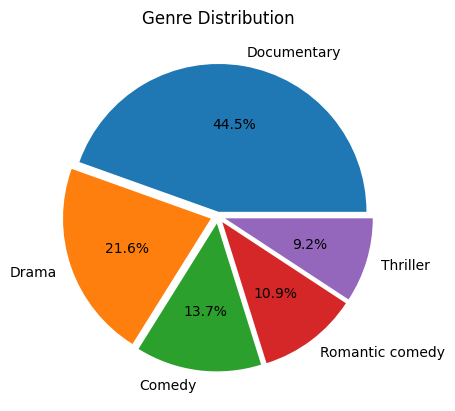

In [120]:
plt.pie(top_gen,labels=top_gen.index,explode=[0.03,0.05,0.05,0.05,0.05],autopct='%1.1f%%')
plt.title('Genre Distribution')
plt.show()

Movie Premiere dates Analysis

In [121]:
#Premiere column is given a 'object' datatype
#Converting object type into date format
data['Premiere'] = pd.to_datetime(data['Premiere'],format='mixed')
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi


In [122]:
year=[]
for i in data['Premiere']: year.append(i.year)
year=pd.DataFrame(year,columns=['Premiere_year'])
data=pd.concat((data,year),axis=1)

In [123]:
year_dist=data['Premiere_year'].value_counts().sort_values(ascending=False)
print("Number of Netflix movies released in each year:",year_dist)

Number of Netflix movies released in each year: Premiere_year
2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: count, dtype: int64


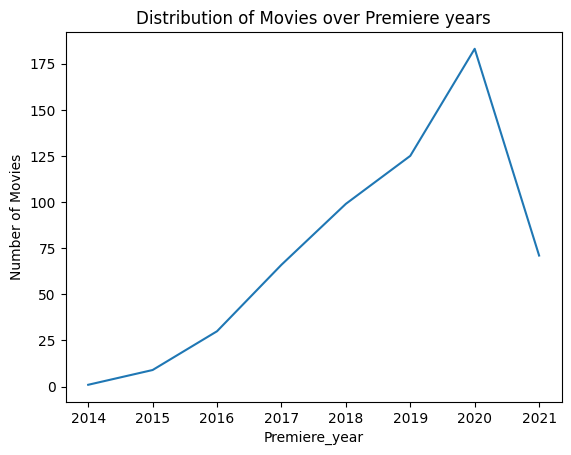

In [124]:
sns.lineplot(year_dist)
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies over Premiere years')
plt.show()

Movie Runtime Analysis

In [125]:
data['Runtime'].describe()

count    584.000000
mean      93.577055
std       27.761683
min        4.000000
25%       86.000000
50%       97.000000
75%      108.000000
max      209.000000
Name: Runtime, dtype: float64

<Axes: ylabel='Runtime'>

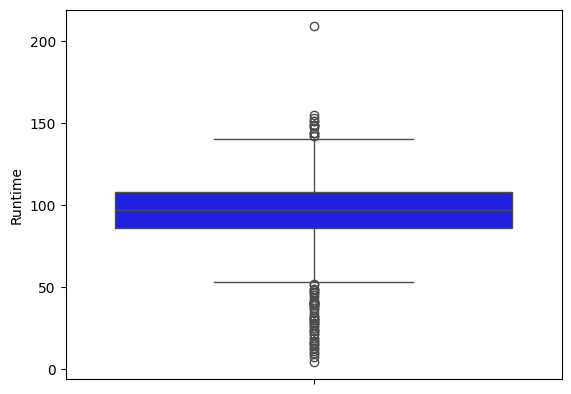

In [126]:
#Outlier detection in Runtime with the help of boxplot
sns.boxplot(data['Runtime'],color='blue')

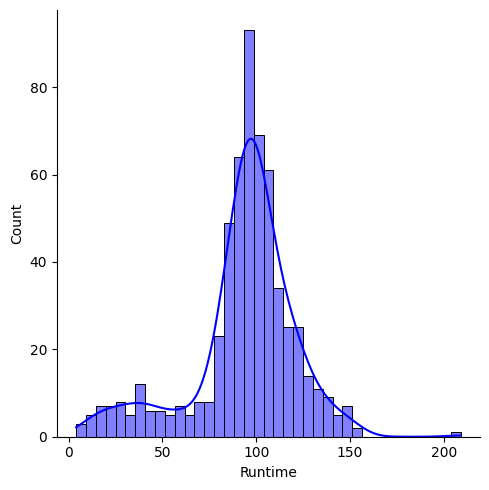

In [127]:
sns.displot(data, x="Runtime",kde=True,color='blue')
plt.show()

Movie Language Analysis

In [128]:
top_gen=data['Language'].value_counts().sort_values(ascending=False).head(5)
print('Top 5 Languages:',top_gen)

Top 5 Languages: Language
English    401
Hindi       33
Spanish     31
French      20
Italian     14
Name: count, dtype: int64


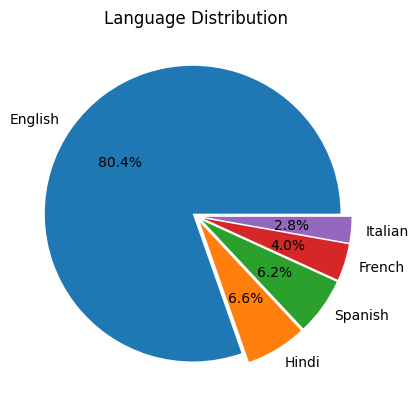

In [129]:
plt.pie(top_gen,labels=top_gen.index,explode=[0.03,0.05,0.05,0.05,0.05],autopct='%1.1f%%')
plt.title('Language Distribution')
plt.show()

IMDB Scores Analysis

In [130]:
data['IMDB Score'].describe()

count    584.000000
mean       6.271747
std        0.979256
min        2.500000
25%        5.700000
50%        6.350000
75%        7.000000
max        9.000000
Name: IMDB Score, dtype: float64

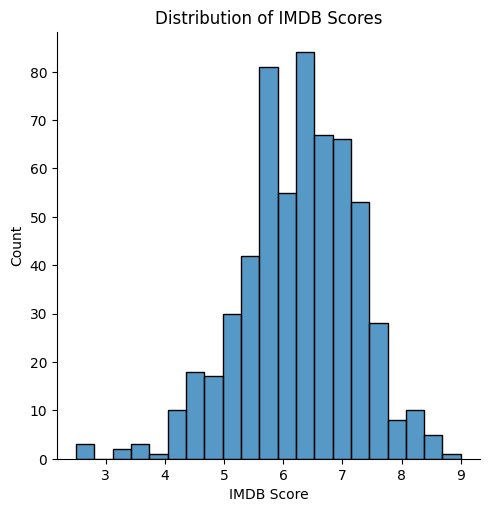

In [131]:
sns.displot(data, x="IMDB Score")
plt.title('Distribution of IMDB Scores')
plt.show()

# **Segmented Univariate Analysis**

Distribution of IMDB scores segmented by genre

In [132]:
#Getting the top 5 genres from the 'Genre' column
top_gens=data['Genre'].value_counts().sort_values(ascending=False).head(5).index

In [133]:
#Fetching data for Top5 genres
top_genres_data = data[data['Genre'].isin(top_gens)]

<ipython-input-134-fdb285b19283>:2: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.violinplot(x='Genre', y='IMDB Score', data=top_genres_data, alpha=0.8, palette= sns.color_palette("Set1"))


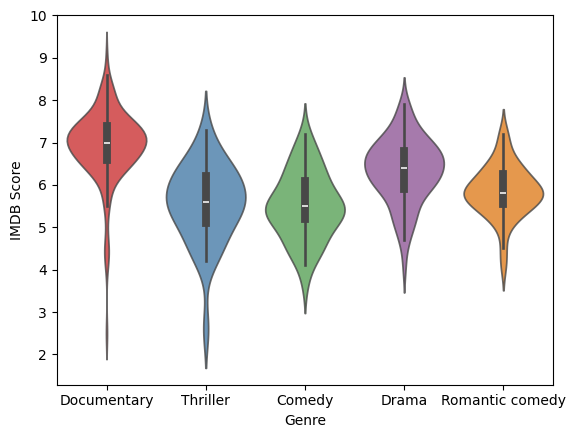

In [134]:
#Violin plot to show Distribution of IMDB scores segmented by genre for Top 5 genres
sns.violinplot(x='Genre', y='IMDB Score', data=top_genres_data, alpha=0.8, palette= sns.color_palette("Set1"))
plt.xlabel('Genre')
plt.ylabel('IMDB Score')
plt.show()

Distribution of movie runtimes segmented by language

In [135]:
#Getting the top 5 movie languages from the 'Language' column
top_lang=data['Language'].value_counts().sort_values(ascending=False).head(5).index
#Fetching data for Top 5 languages
top_lang_data = data[data['Language'].isin(top_lang)]

<ipython-input-136-222b22d47b1c>:1: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.boxplot(x='Language', y='Runtime', data=top_lang_data, palette= sns.color_palette("Set3"))


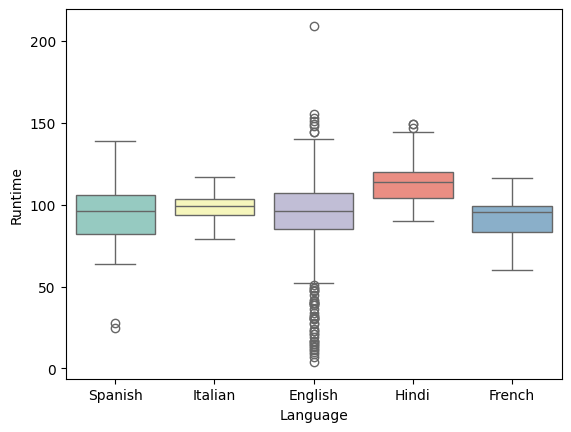

In [136]:
sns.boxplot(x='Language', y='Runtime', data=top_lang_data, palette= sns.color_palette("Set3"))
plt.xlabel('Language')
plt.ylabel('Runtime')
plt.show()

Distribution of premiere dates segmented by genre

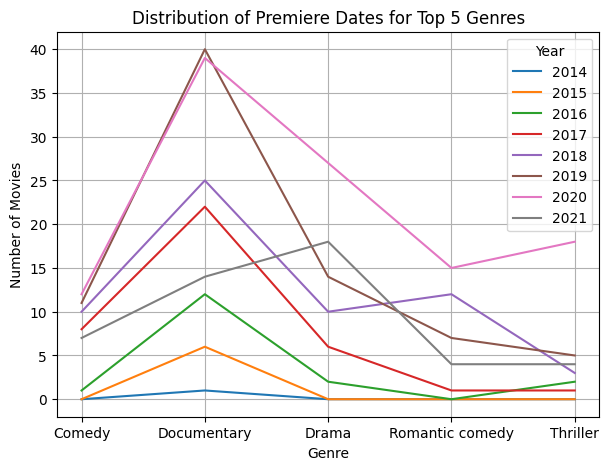

In [137]:
genre_premiere_counts = top_genres_data.groupby(['Genre', 'Premiere_year']).size().unstack(fill_value=0)
plt.figure(figsize=(7,5))
for genre in genre_premiere_counts.columns:
    plt.plot(genre_premiere_counts.index, genre_premiere_counts[genre], label=genre)

plt.title('Distribution of Premiere Dates for Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.legend(title='Year')
plt.grid(True)
plt.show()

# **Bivariate Analysis**

Relation between IMDB scores and movie runtimes

Correlation between Runtime and IMDB Score: -0.04089629142078858


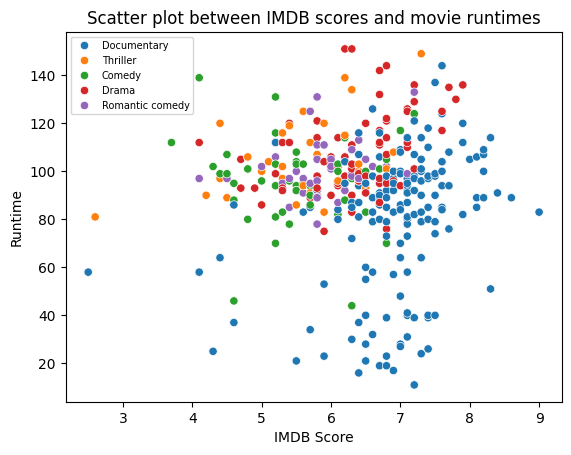

In [138]:
print("Correlation between Runtime and IMDB Score:",np.corrcoef(data['IMDB Score'],data['Runtime'])[0][1])
#Scatter plot between IMDB scores and movie runtimes
sns.scatterplot(data=data,x='IMDB Score',y='Runtime',hue=top_genres_data['Genre'])
plt.title('Scatter plot between IMDB scores and movie runtimes')
plt.legend(fontsize=7)
plt.show()

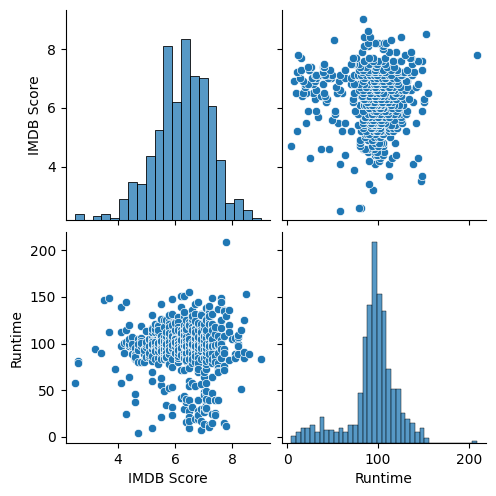

In [139]:
sns.pairplot(data[['IMDB Score', 'Runtime','Genre']])
plt.show()

Average runtime of movies released in different months

In [140]:
data['Premiere'] = pd.to_datetime(data['Premiere'])
data['Month'] = data['Premiere'].dt.month
runtime_month = data.groupby('Month')['Runtime'].mean().round()

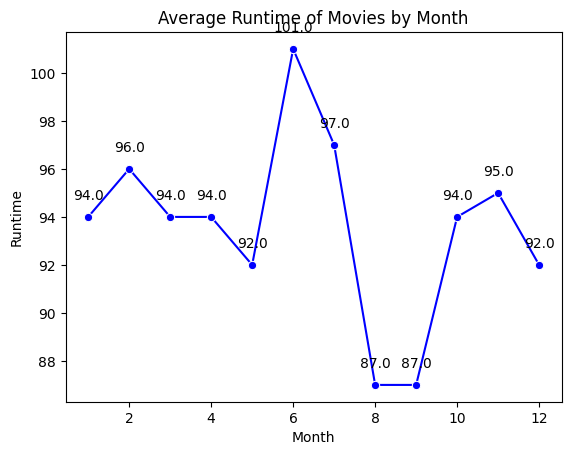

In [141]:
sns.lineplot(x=runtime_month.index, y=runtime_month.values, marker='o', color='blue')
plt.title('Average Runtime of Movies by Month')
plt.ylabel('Runtime')
for i, value in enumerate(runtime_month.values):
    plt.annotate(str(value), (runtime_month.index[i], value), textcoords="offset points", xytext=(0,12), ha='center')
plt.show()

Correlation between IMDB scores and premiere dates

Correlation between IMDB Scores and Premiere dates: -0.14134731432111766


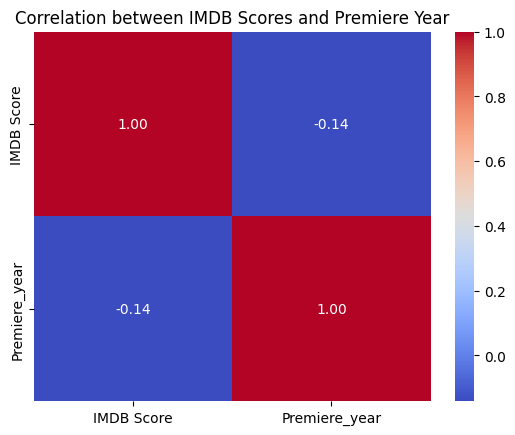

In [142]:
print("Correlation between IMDB Scores and Premiere dates:",np.corrcoef(data['IMDB Score'],data['Premiere_year'])[0][1])
sns.heatmap(data[['IMDB Score', 'Premiere_year']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between IMDB Scores and Premiere Year')
plt.show()

Top 5 movies as per IMDB Scores and their respective Genres

In [143]:
top5=data[data['IMDB Score'].isin(data['IMDB Score'].sort_values(ascending=False).head(5))]
print("Top 5 movies by IMDB Score:\n",top5['Title'])

Top 5 movies by IMDB Score:
 578     Ben Platt: Live from Radio City Music Hall
579          Taylor Swift: Reputation Stadium Tour
580    Winter on Fire: Ukraine's Fight for Freedom
581                        Springsteen on Broadway
582      Emicida: AmarElo - It's All For Yesterday
583       David Attenborough: A Life on Our Planet
Name: Title, dtype: object


<ipython-input-144-307d301f0356>:1: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.barplot(top5,x='Title',y='IMDB Score',width=0.4,hue='Genre',palette=sns.color_palette('Set1'))


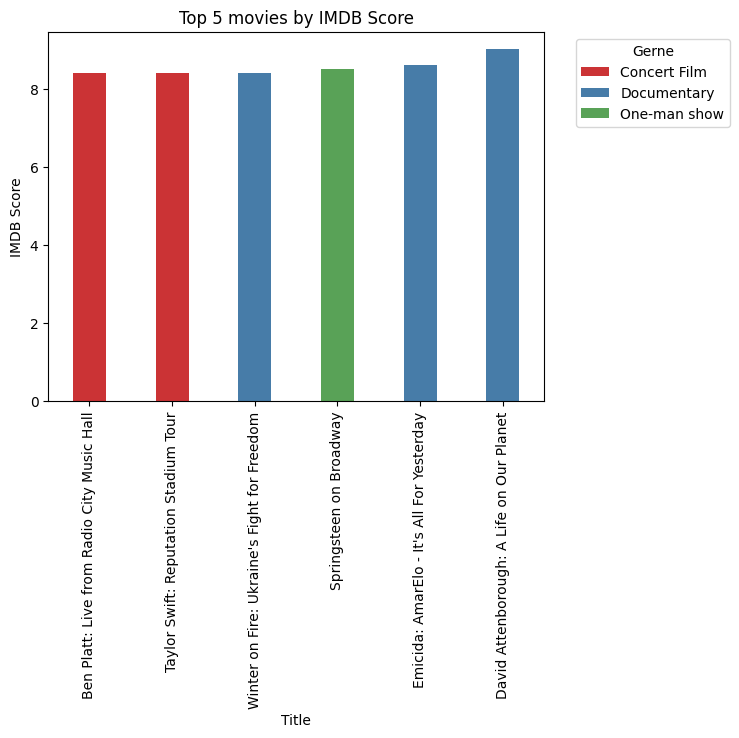

In [144]:
sns.barplot(top5,x='Title',y='IMDB Score',width=0.4,hue='Genre',palette=sns.color_palette('Set1'))
plt.xticks(rotation=90)
plt.title('Top 5 movies by IMDB Score')
plt.legend(title='Gerne', bbox_to_anchor=(1.05, 1), loc='upper left');
plt.show()

Top 5 movies as per Runtime

In [145]:
top5=data[data['Runtime'].isin(data['Runtime'].sort_values(ascending=False).head(5))]
print("Top 5 movies by Runtime:\n",top5['Title'])

Top 5 movies by Runtime:
 247                   Citation
284         The Forest of Love
328                Da 5 Bloods
561               The Irishman
581    Springsteen on Broadway
Name: Title, dtype: object


<ipython-input-146-051af6a72a85>:1: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  sns.barplot(top5,x='Title',y='Runtime',width=0.4,hue='Genre',palette=sns.color_palette('Set3'))


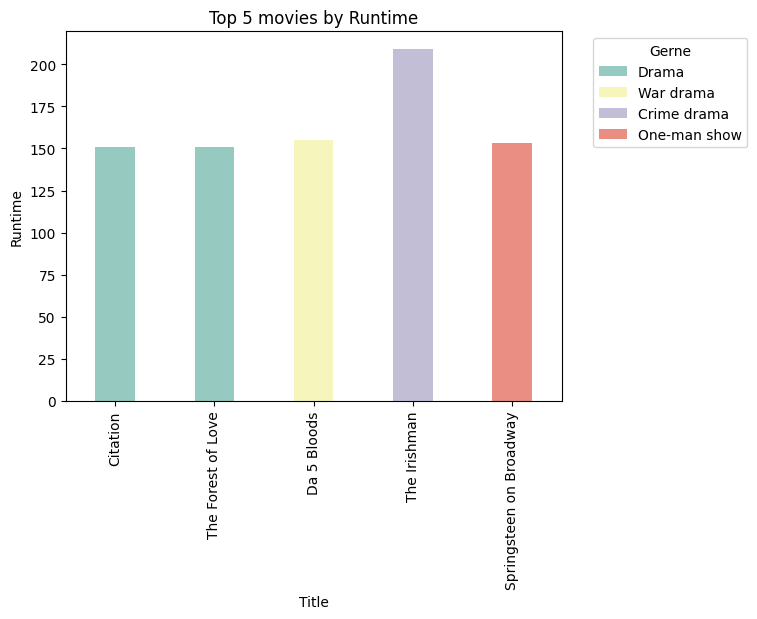

In [146]:
sns.barplot(top5,x='Title',y='Runtime',width=0.4,hue='Genre',palette=sns.color_palette('Set3'))
plt.xticks(rotation=90)
plt.title('Top 5 movies by Runtime')
plt.legend(title='Gerne', bbox_to_anchor=(1.05, 1), loc='upper left');
plt.show()